In [16]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [17]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.12987904 0.10270602 0.11342533 ... 0.32034329 0.06404667 0.0214113 ]
 [0.12422921 0.09823824 0.10849125 ... 0.30640814 0.06126059 0.02047989]
 [0.10392551 0.08218243 0.09075972 ... 0.25632957 0.05124832 0.01713271]
 ...
 [0.30695192 0.24273209 0.26806575 ... 0.75708896 0.15136582 0.05060277]
 [0.2169197  0.17153622 0.18943925 ... 0.53502681 0.10696863 0.03576045]
 [0.31377841 0.24813035 0.27402743 ... 0.77392631 0.15473213 0.05172816]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.14527192  0.03679734  0.00561431 ...  0.2174401  -0.0676992
   0.07044689]
 [ 0.0080194  -0.02009475  0.06492235 ...  0.31435429 -0.00500008
   0.02426099]
 [ 0.02690645  0.21749386  0.26911927 ...  0.31559363  0.03721684
  -0.07247454]
 ...
 [ 0.25056462  0.20196899  0.32159689 ...  1.00477313  0.184148
  -0.05076991]
 [ 0.12313698  0.0966814   0.37962393 ...  0.52882866  0.2268017
   0.0057241 ]
 [ 0.24899126  0.23489613  0.25520922 ...  0.6204334   0.11387118
   0.031058

In [18]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [19]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                prior_L="point_laplace") 

 

In [20]:
mycebmf.initialize()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([-0.1511, -0.1784, -0.0122, -0.0353,  0.1130, -0.3737, -0.1084, -0.0022,
         0.0366,  0.1217, -0.1910,  0.2081, -0.0551,  0.1556,  0.1946, -0.1635,
        -0.1412, -0.0069,  0.0237, -0.1352,  0.0144,  0.1408,  0.1657, -0.1440,
         0.0962,  0.4549, -0.3481, -0.0619, -0.2406, -0.2033,  0.2314, -0.1041,
        -0.2509,  0.0080, -0.1589, -0.1767,  0.0473, -0.1734,  0.3143,  0.1004,
        -0.0059,  0.1441,  0.2780,  0.0526,  0.0844,  0.3576, -0.0975,  0.0938,
        -0.1231,  0.0850])
tensor([ 0.0966, -0.0043, -0.0130,  0.0168,  0.1318,  0.0265,  0.0016, -0.3894,
         0.0372, -0.1388, -0.0284,  0.1387, -0.1141,  0.3584,  0.1265, -0.0789,
         0.1972, -0.1830,  0.0753,  0.0412,  0.1579,  0.0757, -0.0468, -0.0514,
        -0.4375, -0.1790,  0.0987,  0.0921,  0.1584,  0.2441, -0.0554, -0.1004,
        -0.0518,  0.0922,  0.1163,  0.0076,  0.1262, -0.2695, -0.0051,  0.2191])


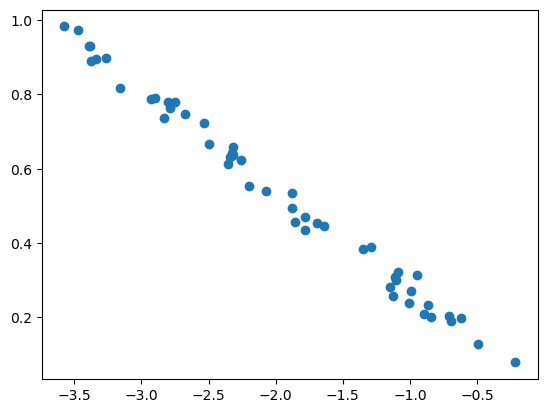

In [21]:
plt.scatter( mycebmf.L[:,0],u)

In [22]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

tensor(238.9422)
tensor(1.1037)
tensor(0.7773)
tensor(0.7610)
tensor(0.6497)


tensor([[ 0.0940,  0.0564,  0.1162,  ...,  0.3029,  0.0362, -0.0070],
        [ 0.0813,  0.0648,  0.1254,  ...,  0.3258,  0.0546,  0.0339],
        [ 0.1102,  0.0825,  0.1202,  ...,  0.3067,  0.0613,  0.0237],
        ...,
        [ 0.3301,  0.2526,  0.3040,  ...,  0.7824,  0.1885,  0.0257],
        [ 0.2057,  0.1362,  0.2618,  ...,  0.6138,  0.1170,  0.0573],
        [ 0.2613,  0.2103,  0.2374,  ...,  0.6782,  0.1305,  0.0263]])

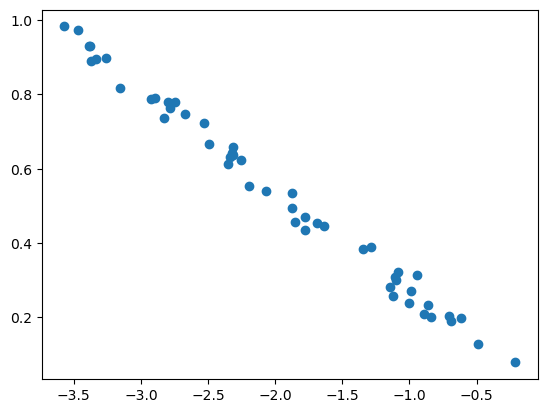

In [23]:
plt.scatter( mycebmf.L[:,0],u)

tensor(238.8966)
tensor(0.8295)
tensor(0.5748)
tensor(0.5687)
tensor(0.4461)


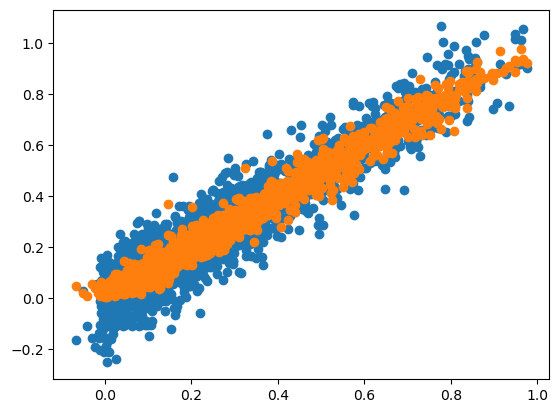

In [24]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [25]:
mycebmf.fit()

tensor(238.9422)
tensor(1.1037)
tensor(0.7773)
tensor(0.7610)
tensor(0.6497)
tensor(238.8966)
tensor(0.8295)
tensor(0.5748)
tensor(0.5687)
tensor(0.4461)
tensor(238.9184)
tensor(0.6352)
tensor(0.5288)
tensor(0.4601)
tensor(0.1487)
tensor(238.9397)
tensor(0.4860)
tensor(0.3427)
tensor(0.2504)
tensor(0.1594)
tensor(238.9442)
tensor(0.3658)
tensor(0.1350)
tensor(0.1350)
tensor(0.1350)
tensor(238.9337)
tensor(0.2756)
tensor(0.2004)
tensor(0.2004)
tensor(0.2004)
tensor(238.9152)
tensor(0.2079)
tensor(0.0050)
tensor(0.0050)
tensor(0.0050)
tensor(238.9004)
tensor(0.1574)
tensor(0.0050)
tensor(0.0050)
tensor(0.0050)
tensor(238.8927)
tensor(0.1202)
tensor(0.0050)
tensor(0.0050)
tensor(0.0050)
tensor(238.8898)
tensor(0.0929)
tensor(0.0050)
tensor(0.0050)
tensor(0.0050)
tensor(238.8873)
tensor(0.0727)
tensor(0.0020)
tensor(0.0020)
tensor(0.0020)
tensor(238.8840)
tensor(0.0574)
tensor(0.0050)
tensor(0.0050)
tensor(0.0050)
tensor(238.8803)
tensor(0.0456)
tensor(0.0050)
tensor(0.0050)
tensor(0.0050)

CEBMFResult(L=tensor([[-1.0869e+00,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-1.1067e+00,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-1.1210e+00,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-1.3419e+00,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-1.7763e+00,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-1.6330e+00,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-3.5682e+00,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-3.3862e+00,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-9.4456e-01,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-4.8960e-01,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-2.3114e+00,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-2.9235e+00,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-2.8284e+00,  4.5851e-08,  4.5851e-08,  4.5851e-08,  4.5851e-08],
        [-6

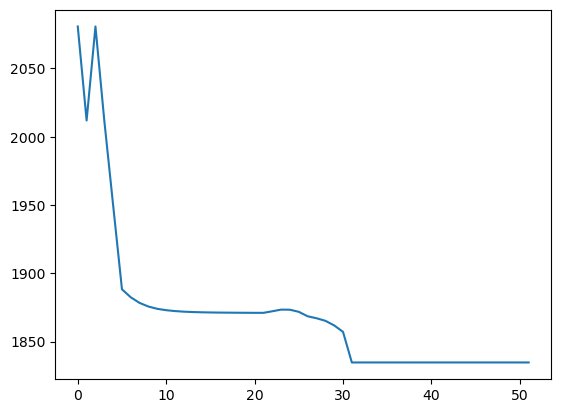

In [26]:
plt.plot(mycebmf.obj)

tensor(0.0007, dtype=torch.float64)

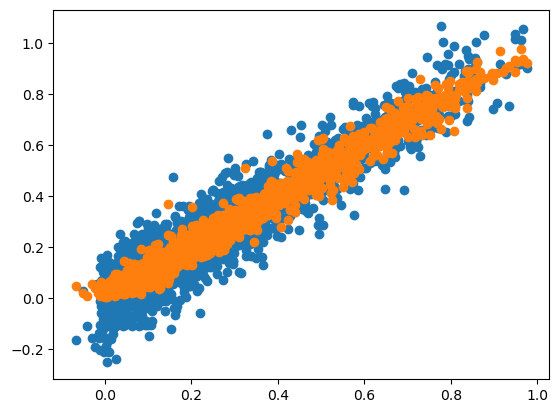

In [27]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

In [28]:
results =[]
for i in range(200):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                      prior_L="point_laplace") 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

tensor(212.2776)
tensor(1.1879)
tensor(1.1843)
tensor(0.8947)
tensor(0.7667)
tensor(212.1653)
tensor(0.9920)
tensor(0.9916)
tensor(0.7446)
tensor(0.5808)
tensor(212.0860)
tensor(0.8827)
tensor(0.8514)
tensor(0.6539)
tensor(0.5856)
tensor(212.0262)
tensor(0.8134)
tensor(0.7479)
tensor(0.5509)
tensor(0.5288)
tensor(211.9465)
tensor(0.7757)
tensor(0.6737)
tensor(0.4349)
tensor(0.0050)
tensor(211.8477)
tensor(0.7534)
tensor(0.6174)
tensor(0.2241)
tensor(0.0050)
tensor(211.7270)
tensor(0.7410)
tensor(0.5620)
tensor(0.1535)
tensor(0.0050)
tensor(211.5944)
tensor(0.7336)
tensor(0.5140)
tensor(0.0247)
tensor(0.0044)
tensor(211.4523)
tensor(0.7163)
tensor(0.4717)
tensor(0.1472)
tensor(0.0050)
tensor(211.3231)
tensor(0.6886)
tensor(0.4323)
tensor(0.1603)
tensor(0.0050)
tensor(211.2182)
tensor(0.6563)
tensor(0.3950)
tensor(0.0854)
tensor(0.0050)
tensor(211.1367)
tensor(0.6227)
tensor(0.3593)
tensor(0.0909)
tensor(0.0105)
tensor(211.0729)
tensor(0.5892)
tensor(0.3246)
tensor(0.0348)
tensor(0.0036)

KeyboardInterrupt: 

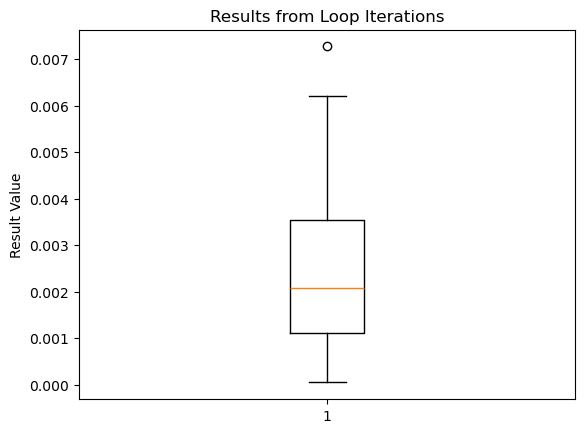

In [29]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [30]:
res= np.asarray(results)
np.mean(res )

0.0023319722999957386